Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-8. Продвинутые методы машинного обучения**

---

## **✍ Оглавление:**

1. Введение
2. Ансамблирование: бэггинг, случайный лес
3. Ансамблирование: блендинг и стекинг
4. Ансамблирование: бустинг

---

## **1. Введение**

**<center> Ансамблирование моделей </center>**

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.

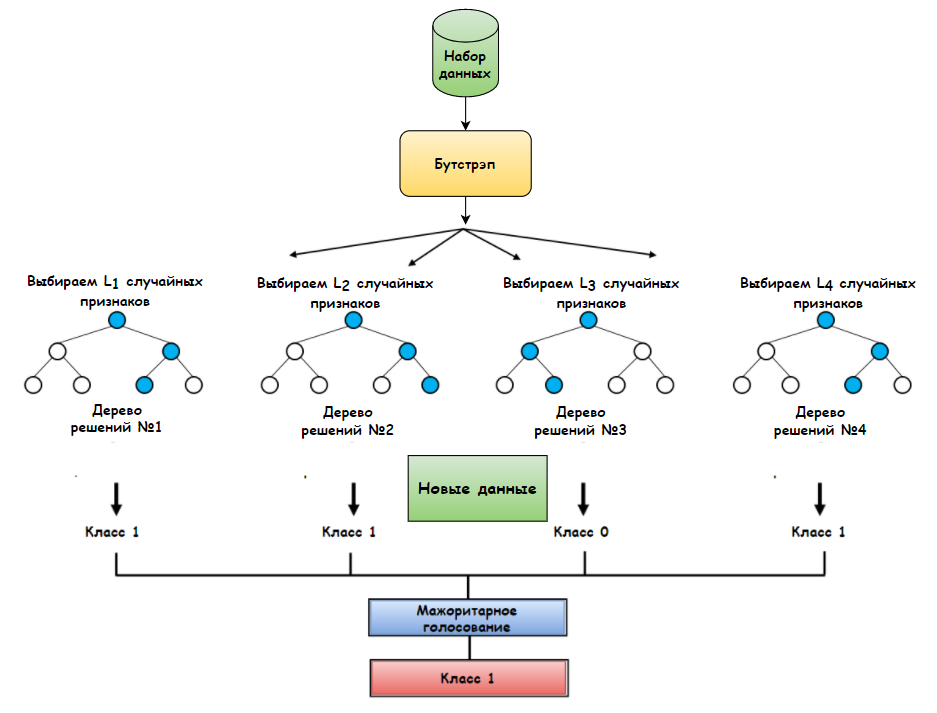

Этот знакомый нам подход построения ансамбля называется бэггингом и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

**<center> Pipeline </center>**

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, кросс-валидации). 

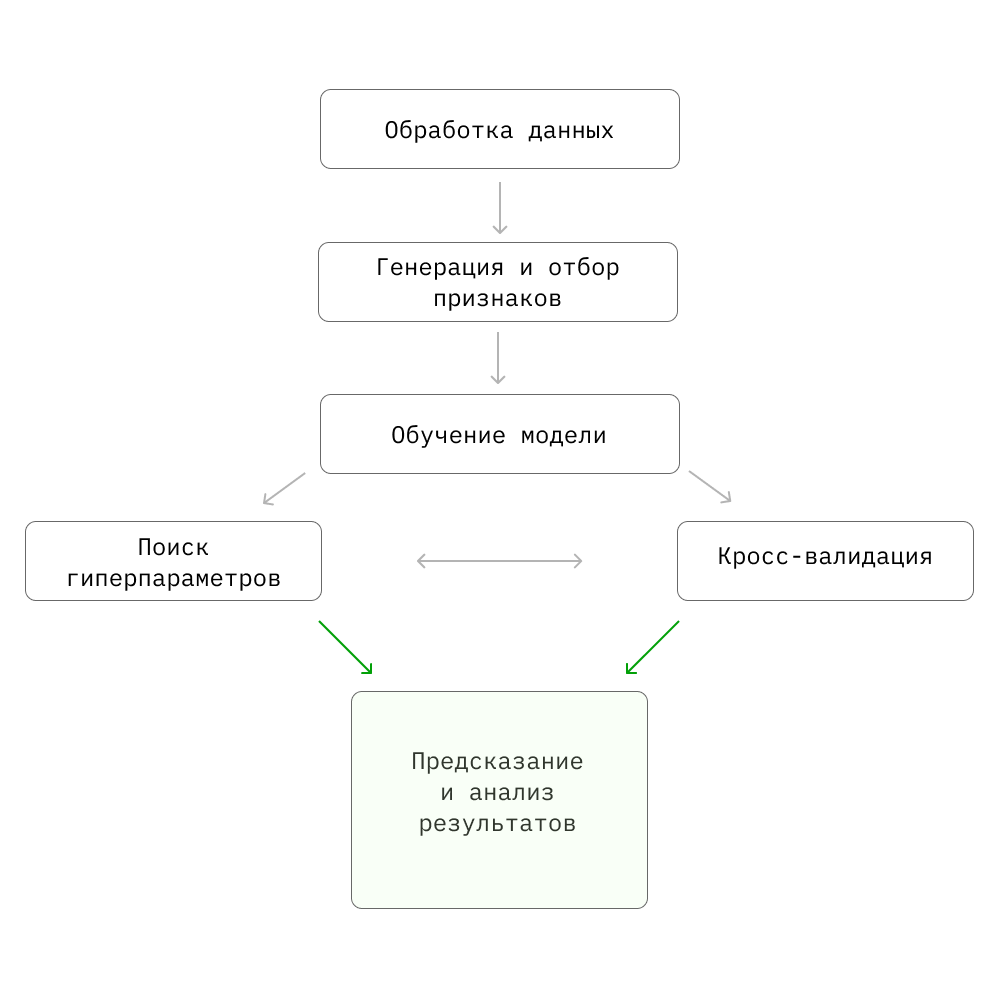

Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

Также  под пайплайном иногда подразумевают автоматизацию одного или нескольких этапов, названных ранее, например обработку данных. 

**<center> Metric Learning </center>**

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами metric learning (часто их обозначают как **метрические алгоритмы**). Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача **кластеризации** и **задача понижения размерности**. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

## **2. Ансамблирование: бэггинг, случайный лес**

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.

*Существует три основных способа построения ансамблей:*

**Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
**Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
**Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

**Бэггинг (bagging)** — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам **случайный лес (Random Forest)**. 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи классификации ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи регрессии же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

In [47]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

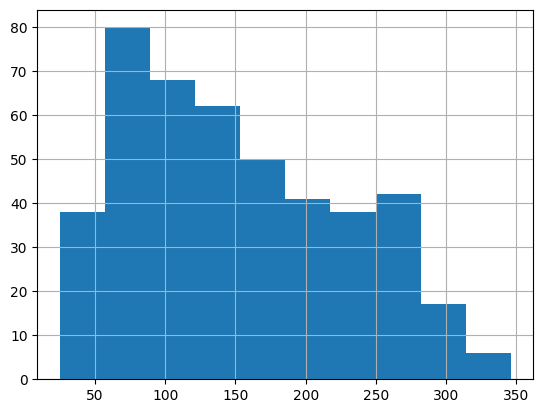

In [48]:
# Посмотрим на распределение целевого признака
y.hist()

In [49]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (296, 10)
# Размерность тестовой выборки (146, 10)


# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=1000, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)

# Создаем модель случайного леса из 10 деревьев с максимальной
# глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=1000, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)

# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')

# Будет выведено:
# Качество предсказания по MSE для решающего дерева 6132.51
# Качество предсказания по MSE для случайного леса  3548.31

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)
Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09


In [50]:
regr1 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr1.fit(X_train, y_train)
regr2 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09


Ансамблирование улучшает предсказание базовой модели!

⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем дисперсия отдельной базовой модели.

Эта методика применима не только к решающим деревьям, но и к другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

## **3. Ансамблирование: блендинг и стекинг**

**Стекинг (stacking)** — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**. 

**<center> БЛЕНДИНГ </center>**

Простейшая реализация стекинга заключается в **блендинге (blending)**. 

Схематично блендинг можно представить следующим образом:

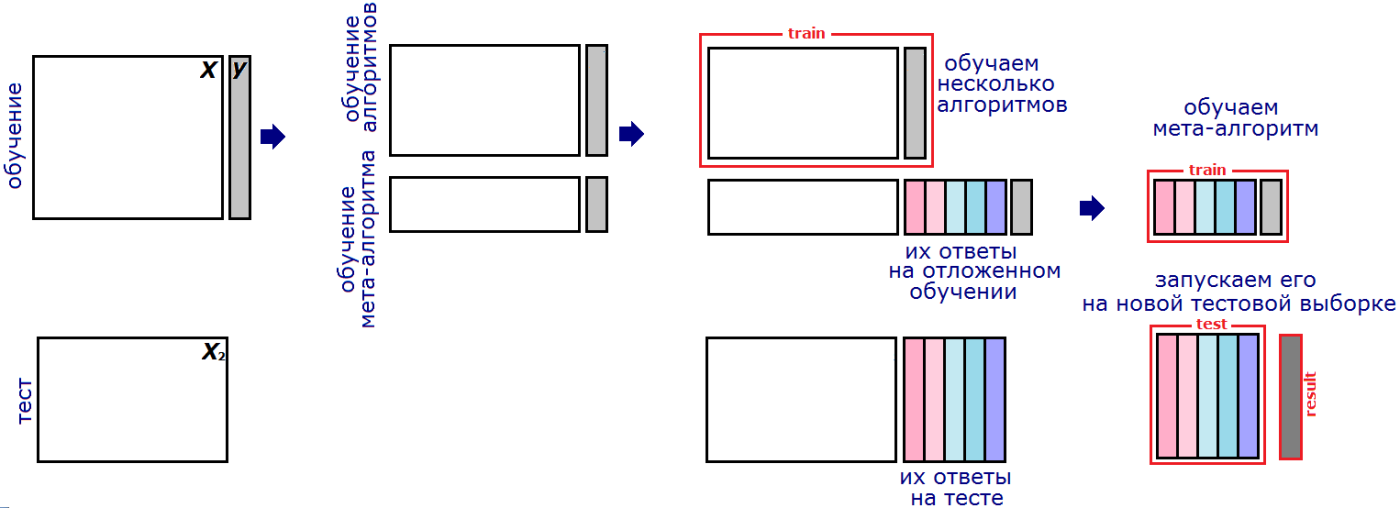

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка X, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – метапризнаки, на которых уже и обучается в дальнейшем метамодель. 

Недостатки блендинга видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

**<center> СТЕКИНГ </center>**

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Есть некоторые рекомендации, как правильно строить стекинг:

- В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
- В качестве базовых моделей лучшего всего использовать модели различной природы.

**<center> Стекинг в SKLEARN </center>**

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

**Примечание.** Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Как и все ансамбли, модель стекинга находится в модуле ensemble.

In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# Обучаем модель с помощью метода fit(),
# делаем предсказание классов с помощью метода predict(),
# а затем считаем метрики:

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле                    
        random_state=42 #датчик генератора случайных чисел
    )
)
# Обучаем модель
reg.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

# Будет выведено:
# Качество предсказания по MSE для стекинга 3464.11

# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

Качество предсказания по MSE для стекинга 3467.74


,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


In [52]:
from sklearn.linear_model import LinearRegression
estimators = [
    ('rr', RidgeCV()),
    ('lr',  LinearRegression())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
)
#Обучаем модель
reg.fit(X_train, y_train)

y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),1)}')

Качество предсказания по MSE для стекинга 3534.7


## **4. Ансамблирование: бустинг**

**Бустинг (boosting)** — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

**Примечание.** Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями М. Кернсом и Л. Вэлиантом: «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые **веса наблюдений.** Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

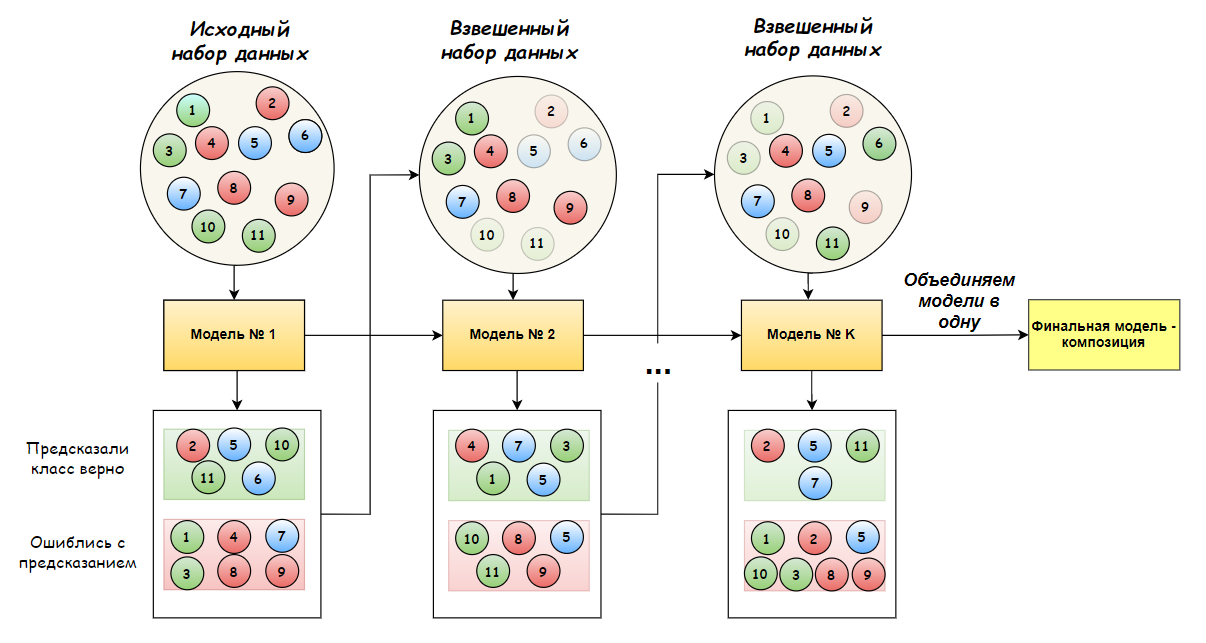

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

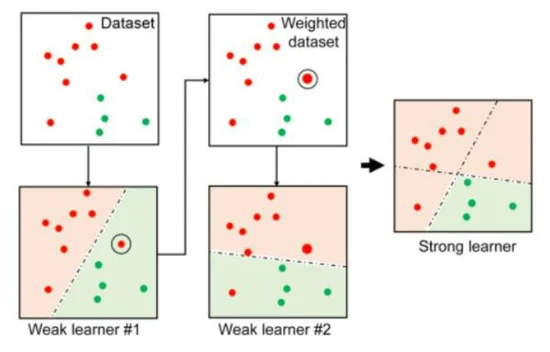

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

Примечание. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то цель бустинга — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают алгоритмы с высоким смещением и небольшим разбросом, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

**<center> АДАПТИВНЫЙ БУСТИНГ </center>**

Первая реализация бустинга называлась **AdaBoost.** Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

**<center> АДАПТИВНЫЙ БУСТИНГ В SKLEARN </center>**

В sklearn адаптивный бустинг над решающими деревьями реализован в модуле sklearn.ensemble в виде классов AdaBoostRegressor и AdaBoostClassifier для задач регрессии и классификации соответственно.

In [53]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Будет выведено:
# Качество предсказания по MSE для AdaBoost 3116.48

Качество предсказания по MSE для AdaBoost 3040.83


In [54]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)
 
ada = AdaBoostRegressor(
	base_estimator=dt,
random_state=42, 
n_estimators=50
)
ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')
 
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)
 
ada = AdaBoostRegressor(
base_estimator=dt,
random_state=42, 
n_estimators=100
)
ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

TypeError: __init__() got an unexpected keyword argument 'base_estimator'

Основное отличие градиентного бустинга от адаптивного заключается в том, что градиентный бустинг строит композицию из своих базовых моделей, подбирая их оптимальным образом на основе принципа градиентных методов оптимизации. Такая модификация позволяет значительно ускорить процесс последовательного построения ансамбля в сравнении с реализации AdaBoost и добиться лучшего качества за счет меньшего количества моделей в ансамбле. 

**<center> ГРАДИЕНТНЫЙ БУСТИНГ </center>**

**Градиентный бустинг (Gradient Boosting, GB)** — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием. Впервые алгоритм был опубликован профессором статистики Стэнфордского университета Джеромом Фридманом. Алгоритм оказался очень эффективным и в дальнейшем был множество раз модифицирован — до Extreme Gradient Boosting (XgBoost) и других модификаций, таких как CatBoost от Яндекса и LightGMB от Microsoft.

В GB принцип классического бустинга сохраняется: каждый последующий алгоритм улучшает предыдущий, но, в отличие эвристического «взвешивания» наблюдений, градиентный бустинг использует информацию о функции потерь для построения нового алгоритма. 

В качестве базовой модели можно использовать всё что угодно, но общепринятым является использование деревьев решений. Практика показывает, что это наилучший выбор, так как деревья решений очень просты в построении и из всех слабых моделей обладают наилучшей способностью описывать сложные зависимости.

Бустинг, использующий в качестве базовой модели дерево решений, называется **градиентным бустингом над деревьями решений (Gradient Boosting on Decision Trees, GBDT)**. 

Схематично работу алгоритма GBDT можно представить следующим образом:

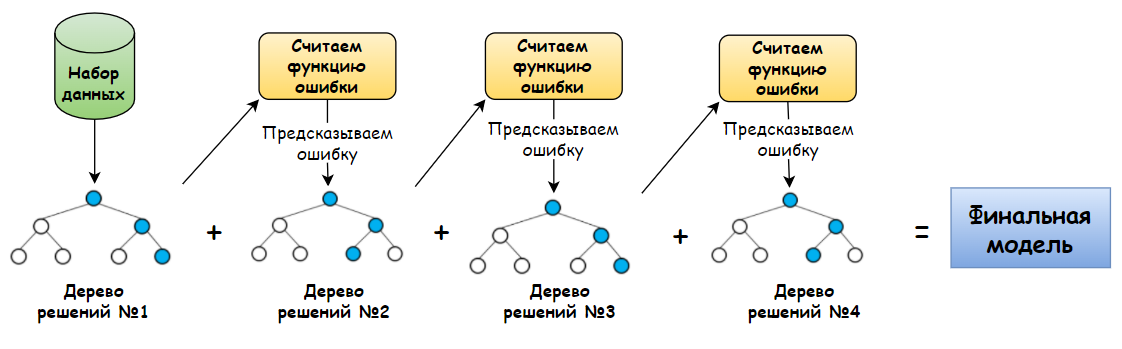

Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях. Это преимущество стало причиной доминирования GBDT на огромном спектре соревнований — от кредитного скоринга до рекомендательных систем.

В заключение введения в градиентный бустинг приведём некоторые рекомендации по **выбору внешних параметров алгоритма:**

**Количество деревьев (n_estimators).** Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке.
**Темп обучения  (learning_rate).** Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1.
**Максимальная глубина деревьев (max_depth).** Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.

**<center> ГРАДИЕНТНЫЙ БУСТИНГ В SKLEARN </center>**

Градиентный бустинг над деревьями для решения задачи регрессии реализован в классе GradientBoostingRegressor. Для задачи классификации данный метод реализован в классе GradientBoostingClassifier. Параметры у классов схожи, различия только в функции потерь.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
# Будет выведено:
# Качество предсказания по MSE для GradientBoosting 3477.3

Качество предсказания по MSE для GradientBoostingRegressor 3286.02


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42, n_estimators=50)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
 
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
 
 
 
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
 
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 3100.08
Качество предсказания по MSE для GradientBoostingRegressor 3286.02


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

# Создаем матрицу наблюдений
X = df.drop(['quality'],axis = 1)
# Создаем вектор признаков для бинарной классификации
y = (df['quality'] >5).astype(int)

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# Посмотрим на размерности выборок
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (1071, 11)
# Размерность тестовой выборки (528, 11)

# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       238
           1       0.81      0.83      0.82       290

    accuracy                           0.80       528
   macro avg       0.80      0.80      0.80       528
weighted avg       0.80      0.80      0.80       528



In [ ]:
# Прогнозируем вероятности принадлежности к классам
y_pred_proba = gb.predict_proba(X_test)
print(y_pred_proba)

[[0.7575177  0.2424823 ]
 [0.81931477 0.18068523]
 [0.80325657 0.19674343]
 ...
 [0.0212709  0.9787291 ]
 [0.90355559 0.09644441]
 [0.80946194 0.19053806]]
